# Statistics from Stock Data

In this lab we will load stock data into a Pandas Dataframe and calculate some statistics on it. We will be working with stock data from Google, Apple, and Amazon. All the stock data was downloaded from yahoo finance in CSV format. In your workspace you should have a file named GOOG.csv containing the Google stock data, a file named AAPL.csv containing the Apple stock data, and a file  named AMZN.csv containing the Amazon stock data. (You can see the workspace folder by clicking on the Jupyter logo in the upper left corner of the workspace.) All the files contain 7 columns of data:

**Date Open High Low Close Adj_Close Volume**

We will start by reading in any of the above CSV files into a DataFrame and see what the data looks like.

In [4]:
# We import pandas into Python
import pandas as pd

# We read in a stock data data file into a data frame and see what it looks like
df = pd.read_csv('./GOOG.csv')

# We display the first 5 rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


We clearly see that the Dataframe is has automatically labeled the row indices using integers and has labeled the columns of the DataFrame using the names of the columns in the CSV files.

# To Do

You will now load the stock data from Google, Apple, and Amazon into separte DataFrames. However, for each stock data you will only be interested in loading the `Date` and `Adj Close` columns into the Dataframe. In addtion, you want to use the `Date` column as your row index. Finally, you want the DataFrame to recognize the dates as actual dates (year/month/day) and not as strings. For each stock, you can accomplish all theses things in just one line of code by using the appropiate keywords in the `pd.read_csv()` function.


In [5]:
# We load the Google stock data into a DataFrame
google_stock = pd.read_csv('./GOOG.csv',parse_dates=True,index_col=['Date'],usecols=['Date','Adj Close'])

# We load the Apple stock data into a DataFrame
apple_stock = pd.read_csv('./AAPL.csv',parse_dates=True,index_col=['Date'],usecols=['Date','Adj Close'])

# We load the Amazon stock data into a DataFrame
amazon_stock = pd.read_csv('./AMZN.csv',parse_dates=True,index_col=['Date'],usecols=['Date','Adj Close'])

You can check that you have loaded the data correctly by displaying the head of the DataFrames.

In [6]:
# We display the google_stock DataFrame
google_stock.head()

,Adj Close
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


In [7]:
# We display the apple_stock DataFrame
apple_stock.head()


,Adj Close
Date,
2000-01-03,3.596616
2000-01-04,3.293384
2000-01-05,3.341579
2000-01-06,3.052405
2000-01-07,3.196992


In [8]:
# We display the amazon_stock DataFrame
amazon_stock.head()

,Adj Close
Date,
2000-01-03,89.3750
2000-01-04,81.9375
2000-01-05,69.7500
2000-01-06,65.5625
2000-01-07,69.5625


You will now join the three DataFrames above to create a single new DataFrame that contains all the `Adj Close` for all the stocks. Let's start by creating an empty DataFrame that has as row indices calendar days between `2000-01-01`  and `2016-12-31`. We will use the `pd.date_range()` function to create the calendar dates first and then we will create a DataFrame that uses those dates as row indices:

In [9]:
# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)

# To Do

You will now join the the individual DataFrames, `google_stock`, `apple_stock`, and `amazon_stock`, to the `all_stocks` DataFrame. However, before you do this, it is necessary that you change the name of the columns in each of the three dataframes. This is because the column labels in the `all_stocks` dataframe must be unique. Since all the columns in the individual dataframes have the same name, `Adj Close`, we must change them to the stock name before joining them. In the space below change the column label `Adj Close` of each individual dataframe to the name of the corresponding stock. You can do this by using the `pd.DataFrame.rename()` function. 

In [10]:
# Change the Adj Close column label to Google
google_stock = google_stock.rename(columns = {'Adj Close': 'Google'})
apple_stock = apple_stock.rename(columns = {'Adj Close': 'Apple'})
amazon_stock = amazon_stock.rename(columns = {'Adj Close': 'Amazon'})


In [11]:
google_stock.head()

,Google
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


You can check that the column labels have been changed correctly by displaying the datadrames

In [12]:
# We display the google_stock DataFrame
amazon_stock.head()

,Amazon
Date,
2000-01-03,89.3750
2000-01-04,81.9375
2000-01-05,69.7500
2000-01-06,65.5625
2000-01-07,69.5625


In [13]:
apple_stock.head()

,Apple
Date,
2000-01-03,3.596616
2000-01-04,3.293384
2000-01-05,3.341579
2000-01-06,3.052405
2000-01-07,3.196992


Now that we have unique column labels, we can join the individual DataFrames to the `all_stocks` DataFrame. For this we will use the `dataframe.join()` function. The function `dataframe1.join(dataframe2)` joins `dataframe1` with `dataframe2`. We will join each dataframe one by one to the `all_stocks` dataframe. Fill in the code below to join the dataframes, the first join has been made for you:

In [14]:
# We join the Google stock to all_stocks
all_stocks = all_stocks.join(google_stock)

# We join the Apple stock to all_stocks
all_stocks = all_stocks.join(apple_stock)

# We join the Amazon stock to all_stocks
all_stocks =all_stocks.join(amazon_stock)

You can check that the dataframes have been joined correctly by displaying the `all_stocks`  dataframe

In [15]:
# We display the google_stock DataFrame
all_stocks.head()

,Google,Apple,Amazon
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,NaN,3.596616,89.3750
2000-01-04,NaN,3.293384,81.9375
2000-01-05,NaN,3.341579,69.7500


# To Do

Before we proceed to get some statistics on the stock data, let's first check that we don't have any *NaN* values. In the space below check if there are any *NaN* values in the `all_stocks`  dataframe. If there are any, remove any rows that have *NaN* values:

In [16]:
# Check if there are any NaN values in the all_stocks dataframe


# Remove any rows that contain NaN values
all_stocks.isnull().values.any()


True

In [17]:
all_stocks.dropna(inplace=True)

In [18]:
all_stocks.isnull().values.any()

False

In [19]:
all_stocks.head()

,Google,Apple,Amazon
2004-08-19,49.845802,1.973460,38.630001
2004-08-20,53.805050,1.979244,39.509998
2004-08-23,54.346527,1.997236,39.450001
2004-08-24,52.096165,2.053144,39.049999
2004-08-25,52.657513,2.123831,40.299999


Now that you have eliminated any *NaN* values we can now calculate some basic statistics on the stock prices. Fill in the code below

In [34]:
# Print the average stock price for each stock
print("The average of Google stocks is {}".format(all_stocks['Google'].mean()))
print("The average of apple stocks is {}".format(all_stocks['Apple'].mean()))
print("The average of amazon stocks is {}".format(all_stocks['Amazon'].mean()))

# Print the median stock price for each stock
print("\n\nThe median of Google stocks is {}".format(all_stocks['Google'].median()))
print("The median of apple stocks is {}".format(all_stocks['Apple'].median()))
print("The median of amazon stocks is {}".format(all_stocks['Amazon'].median()))
# Print the standard deviation of the stock price for each stock  
print("\n\nThe standard deviation of Google stocks is {}".format(all_stocks['Google'].std()))
print("The standard deviation of apple stocks is {}".format(all_stocks['Apple'].std()))
print("The standard deviation of amazon stocks is {}".format(all_stocks['Amazon'].std()))
# Print the correlation between stocks
all_stocks["Google"].corr(method='pearson')

The average of Google stocks is 347.4202289595508
The average of apple stocks is 47.73601835024078
The average of amazon stocks is 216.59817680481586


The median of Google stocks is 286.397247
The median of apple stocks is 39.461483
The median of amazon stocks is 161.820007


The standard deviation of Google stocks is 187.67159618519074
The standard deviation of apple stocks is 37.42155482402387
The standard deviation of amazon stocks is 199.12979235695607


TypeError: corr() missing 1 required positional argument: 'other'

We will now look at how we can compute some rolling statistics, also known as moving statistics. We can calculate for example the rolling mean (moving average) of the Google stock price by using the Pandas `dataframe.rolling().mean()` method. The `dataframe.rolling(N).mean()` calculates the rolling mean over an `N`-day window. In other words, we can take a look at the average stock price every `N`  days using the above method. Fill in the code below to calculate the average stock price every 150 days for Google stock

In [37]:
# We compute the rolling mean using a 150-Day window for Google stock
rollingMean = all_stocks['Google'].rolling(150).mean()

In [38]:
rMean2 = google_stock.rolling(500).mean()
rollingMean

2004-08-19           NaN
2004-08-20           NaN
2004-08-23           NaN
2004-08-24           NaN
2004-08-25           NaN
2004-08-26           NaN
2004-08-27           NaN
2004-08-30           NaN
2004-08-31           NaN
2004-09-01           NaN
2004-09-02           NaN
2004-09-03           NaN
2004-09-07           NaN
2004-09-08           NaN
2004-09-09           NaN
2004-09-10           NaN
2004-09-13           NaN
2004-09-14           NaN
2004-09-15           NaN
2004-09-16           NaN
2004-09-17           NaN
2004-09-20           NaN
2004-09-21           NaN
2004-09-22           NaN
2004-09-23           NaN
2004-09-24           NaN
2004-09-27           NaN
2004-09-28           NaN
2004-09-29           NaN
2004-09-30           NaN
                 ...    
2016-11-17    747.646401
2016-11-18    747.690468
2016-11-21    747.800668
2016-11-22    747.861534
2016-11-23    748.143001
2016-11-25    748.399867
2016-11-28    748.800534
2016-11-29    749.233867
2016-11-30    749.680667


In [60]:
pd.set_option('display.max_rows',50000)
rMean2

,Google
Date,
2004-08-19,NaN
2004-08-20,NaN
2004-08-23,NaN
2004-08-24,NaN
2004-08-25,NaN
2004-08-26,NaN
2004-08-27,NaN
2004-08-30,NaN
2004-08-31,NaN


We can also visualize the rolling mean by plotting the data in our dataframe. In the following lessons you will learn how to use **Matplotlib** to visualize data. For now I will just import matplotlib and plot the Google stock data on top of the rolling mean. You can play around by changing the rolling mean window and see how the plot changes. 

C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


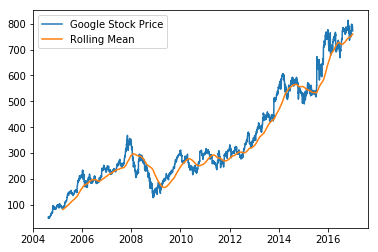

In [39]:
# We import matplotlib into Python
import matplotlib.pyplot as plt
%matplotlib inline

# We plot the Google stock data
plt.plot(all_stocks['Google'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()